# Introduction à la  manipulation d'images


## objectifs

L'objectif de ce cours est de vous familiariser aux bases du traitement d'images. L'objectif sera d'abord de découvrir de quelle manière les images sont généralement représentées de façon numérique en programmant des outils permettant de dessiner des motifs simples sur une image. Suite à ça l'objectif sera de réinvestir ces connaissances et compétences dans des exercices de traitement du signal permettant d'aller jusqu'à réaliser de la soustraction de fond dans une séquence d'iamges

## Utilisation des librairies standards

Pour manipuler des images et les visualiser sur un notebook, il est classique de commencer par utiliser deux librairies.

In [62]:
import numpy as np # Pour manipuler des tableaux de nombres
import matplotlib.pyplot as plt # pour afficher des images

Une image noir et blanc et une grille de valeurs sur deux dimensions. Chaque valeur de cette grille représente l'intensité lumineuse à une certaine abscisse et une certaine ordonnée. Commençons par définir une telle grille plein de zéros grâce à la librairie numpy.

In [63]:
# Creation d'une image noire de taille hauteur x largeur
# (ou plus précisément d'un tableau de hauteur x largeur nombres tous égaux à zéros
# c'est comme une liste à deux dimensions)
hauteur = 12
largeur = 16
img = np.zeros((hauteur,largeur))#.astype(np.int8)

# Affichage du type de img
print("type(img): "+str(type(img)))
# Affichage de la taille d'une image
print("img.shape: "+str(img.shape))

type(img): <class 'numpy.ndarray'>
img.shape: (12, 16)


Comme on le voit, la variable *img* est de type *nbnumpy* ce qui correspond à un tableau à N-dimensions, avec ici *N = 2*. Ce type vient avec certains attributs telle que *shape* qui nous donne sa taille, et des méthodes telles que *transpose()* qui nous permettent de retourner les axes x et y.

La fonction *print()* accepte comme argument les *nbarray*, ce qui nous permettra de voir les valeurs qu'il y a dans notre image. Si on regarde bien le résultat, on voit que cela correspond à une liste de liste comme nous les avions vu dans les cours précédents.

In [64]:
print(img)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Mais il sera bien évidement utile d'afficher l'image comme une image et non comme un tableau de valeur. Malheureusement cela n'est pas offert par la librairie numpy. Cela fait sens en même temps car elle est dédiée au calcul numérique. Pour afficher une image on utilisera une librarie dédiée à la visualisation de donnée qui s'appelle matplotlib de cette manière:

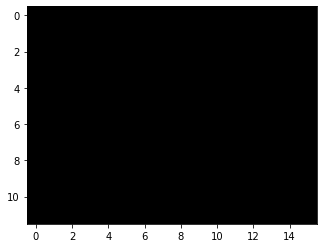

In [65]:
# Affichage de l'image
plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

Remarquez qu'en traitement d'images il est standard de mettre l'origine de l'image en haut à gauche, comme pour les matrices en mathématiques.

Remarquez également que la taille de l'image rendu par l'attribut shape a deux éléments qui sont mis entre parenthèses. On appelle cela un tuple. C'est un type similaire aux listes. On peut accéder aux deux éléments grâce aux crochets []. Par contre on ne pourra pas utiliser la fonction *append()* avec, car le nombre d'éléments est inchangeable, c'est la différence principale.

---
### Exercice 1

*Définir une fonction `printSize(image)` qui prend une image (plus précisément une variable de type np.ndarray) en argument et affiche sa taille comme cela: "La taille de l'image est de 32 x 24 pixels".*

---

# Représentation des images au format numérique

Les images numériques sont représentées de deux façons: soit elles sont pixelisées, soit elles sont au format vectoriel. Ici nous nous intéresserons au **format pixel**. Les images pixelisées sont découpées sous forme d'une grille de pixels, et pour chaque pixel le niveau de gris ou la couleur est définie à l'aide d'un ou respectivement 3 nombres. Ces nombres sont généralement défini en 8 bits (8 zéros ou uns), ce qui donne un nombre pouvant aller de 0 à 255 compris.

Pour commencer nous travaillerons avec des images en niveau de gris. Dans ce cas, chaque pixel est défini par un nombre entier allant de 0 à 255. 0 correspondant au noir et 255 au blanc.

## Accès et manipulation des pixels
Pour accéder aux valeurs d'un pixel dans une image, c'est à dire aux valeurs dans un tableau à 2 dimensions, on utilise le même outils que pour les listes: on va utiliser des indexes. Avec une liste à une dimension *ma_liste*, on accédera au premier élément grâce aux crochets et à l'index 0 en écrivant *ma_liste[0]*. Pour accéder à un élément d'une image, il faudra spécifier à quelle ligne et quelle colonne nous voulons accéder, par exemple pour accéder au pixel en haut à gauche de l'image *img* on utilisera l'instruction *img[0,0]*. Comme pour toutes les variables, il sera possible d'accéder à cet élément mais aussi de l'affecter:

In [66]:
# accès
print(img[0,0])

0.0


255.0


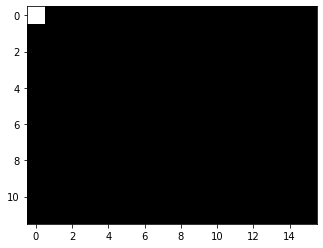

In [67]:
# affectation
img[0,0] = 255

# affichage du résultat
print(img[0,0])

plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

## Accès au dernier, avant dernier... élément sur un axe

Comme nous savons qu'il y a *img.shape[1]* éléments dans une colonne, pour accéder au dernier élément de la première ligne, on pourrait écrire:

In [68]:
print(img[0,img.shape[1]-1])

0.0


Mais cette instruction est longue et python nous offre avec sa syntaxe quelque chose de plus facile. Pour accéder au dernier élément de ma liste, je écrire l'index -1, pour l'avant dernier -2 ...

---
### Exercice 2

*Changer la couleur d'un pixel en bas à droite de l'image et visualisez le résultat.*

---

## Accès et manipulation d'une partie de l'image

Alors qu'il est possible de manipuler une image pixel par pixel, il est parfois souhaitable d'accéder à une partie de l'image englobant plusieurs pixels, c'est à dire, accéder à une image dans l'image. Voici un exemple de cette outil:

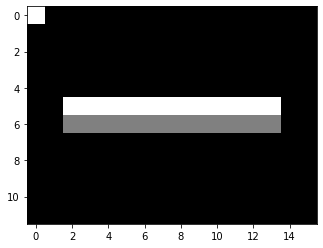

In [69]:
img[5,2:-2] = 255
img[6:7,2:-2] = 128

plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

---
### Exercice 3

+ *Faire un flip horizontal ou vertical d'une image dégradée*
+ *Définir une fonction `draw_line_h(img,y,x1,x2,gray_level)` qui dessiner une ligne horizontal sur la ligne y de la colonne x1 à la colonne x2 dans l'image img avec l'intensité gray_level. Supposez d'abord que x2 > x1, puis faites en sorte que cela marche même si x2 < x1.*
+ *Définir une fonction `isInImage(img,x,y)` qui retourne si un pixel est dans l'image img ou non.*
+ *Améliorer la fonction `draw_line_h(img,y,x1,x2,gray_level)` pour qu'elle ne bug pas même si les coordonnées sont en dehors de l'image.*
+ *Définir une fonction qui dessiner un rectangle prenant pour argument deux points P1(x1,y1) et P2(x2,y2). On pourra définir une autre fonction intermédiaire. *

---
### Exercice 4

+ *Soit deux points P1(x1,y1) et P2(x2,y2) tel que x2 > x1, y2 > y1 et que x2 - x1 > y2 - y1. Définir une fonction qui draw_line(img,x1,y1,x2,y2,gray_level) qui permet de dessiner une ligne du point P1 au point P2.*
+ *Modifier la fonction afin qu'elle marche quelque soit la position des points P1 et P2.*

---
### Exercice 5

*Utiliser les fonctions définies précédemment pour faire un peu d'art abstrait.*